# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime 
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

#lats = np.random.uniform(lat_range[0], lat_range[1], size=10)
#lngs = np.random.uniform(lng_range[0], lng_range[1], size=10)
lat_lngs = zip(lats, lngs)



# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = response = requests.get(query_url + city).json()
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        #city_weather = city_url["city"]["name"]
        #print(city_weather)
      
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date     
        city_lat = city_url["coord"]["lat"]
        city_lng = city_url["coord"]["lon"]
        city_max_temp = (city_url["main"]["temp_max"] - 273.17)
        city_humidity = city_url["main"]["humidity"]
        city_clouds = city_url["clouds"]["all"]
        city_wind = city_url["wind"]["speed"]
        city_country = city_url["sys"]["country"]
        city_date = city_url["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
       print("City not found. Skipping...")
       pass


# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
#city_data

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | mana
Processing Record 5 of Set 1 | petropavlovsk-kamchatsky
Processing Record 6 of Set 1 | invercargill
Processing Record 7 of Set 1 | nova sintra
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | merizo village
Processing Record 10 of Set 1 | tazovsky
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | egilsstadir
Processing Record 14 of Set 1 | tanout
Processing Record 15 of Set 1 | vilyuysk
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | kudahuvadhoo
Processing Record 20 of Set 1 | codrington
Processing Record 21 of Set 1 | is

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,20.20,64,40,6.26,PT,1684949654
1,ushuaia,-54.8000,-68.3000,4.79,75,75,4.63,AR,1684949654
2,yellowknife,62.4560,-114.3525,11.27,76,75,3.60,CA,1684949659
3,mana,5.6592,-53.7767,28.18,81,87,4.03,GF,1684949659
4,petropavlovsk-kamchatsky,53.0452,158.6483,-0.69,93,0,1.00,RU,1684949467


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,20.20,64,40,6.26,PT,1684949654
1,ushuaia,-54.8000,-68.3000,4.79,75,75,4.63,AR,1684949654
2,yellowknife,62.4560,-114.3525,11.27,76,75,3.60,CA,1684949659
3,mana,5.6592,-53.7767,28.18,81,87,4.03,GF,1684949659
4,petropavlovsk-kamchatsky,53.0452,158.6483,-0.69,93,0,1.00,RU,1684949467


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

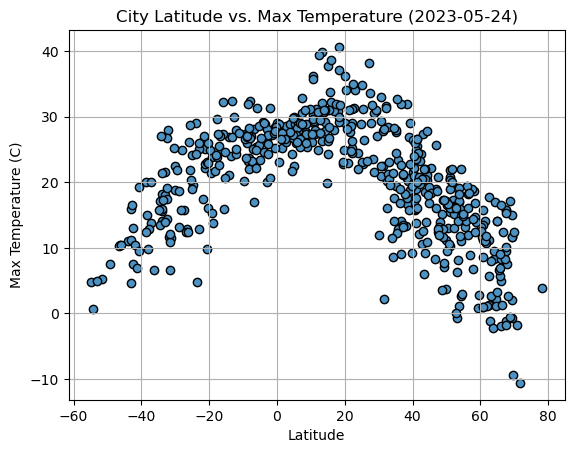

In [8]:
# Build scatter plot for latitude vs. temperature
latitude_x_scatterplot = city_data_df["Lat"]
temperture_y_scatterplot = city_data_df["Max Temp"]

date = pd.to_datetime(city_data_df["Date"],unit='s').dt.strftime('%Y-%m-%d')


# Plot the graph

plt.scatter(latitude_x_scatterplot, temperture_y_scatterplot, marker="o", facecolors="#4c92c3", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Max Temperature ({date[0]})")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

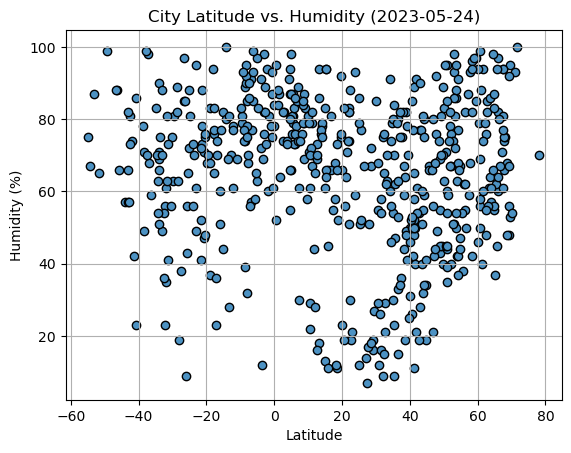

In [9]:
# Build the scatter plots for latitude vs. humidity

latitude_x_scatterplot = city_data_df["Lat"]
humidity_y_scatterplot = city_data_df["Humidity"]
date = pd.to_datetime(city_data_df["Date"],unit='s').dt.strftime('%Y-%m-%d')


# Plot the graph
plt.scatter(latitude_x_scatterplot, humidity_y_scatterplot, marker="o", facecolors="#4c92c3", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date[0]})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

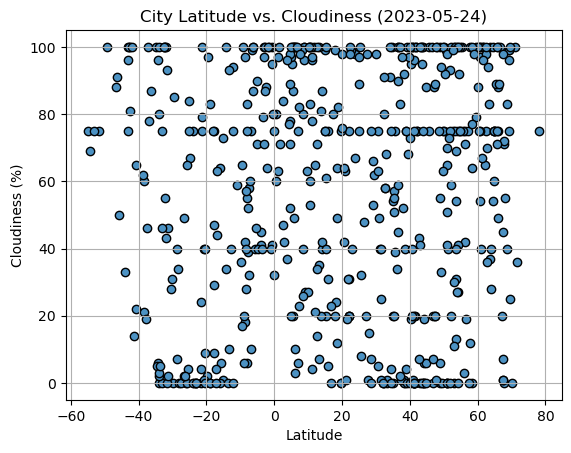

In [10]:
# Build the scatter plots for latitude vs. cloudiness

latitude_x_scatterplot = city_data_df["Lat"]
cloudiness_y_scatterplot = city_data_df["Cloudiness"]
date = pd.to_datetime(city_data_df["Date"],unit='s').dt.strftime('%Y-%m-%d')


# Plot the graph
plt.scatter(latitude_x_scatterplot, cloudiness_y_scatterplot, marker="o", facecolors="#4c92c3", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date[0]})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

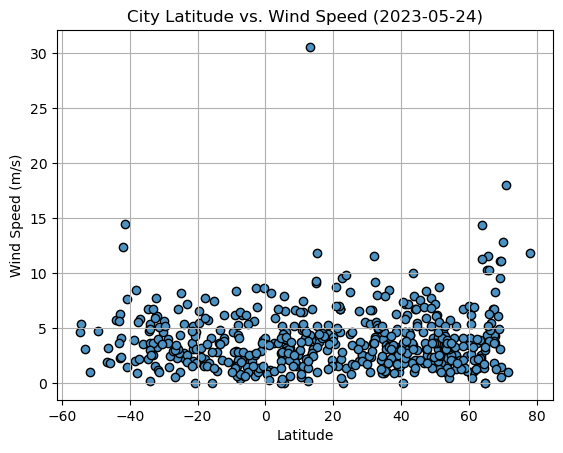

In [11]:
# Build the scatter plots for latitude vs. wind speed

latitude_x_scatterplot = city_data_df["Lat"]
windspeed_y_scatterplot = city_data_df["Wind Speed"]
date = pd.to_datetime(city_data_df["Date"],unit='s').dt.strftime('%Y-%m-%d')


# Plot the graph
plt.scatter(latitude_x_scatterplot, windspeed_y_scatterplot, marker="o", facecolors="#4c92c3", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date[0]})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,20.20,64,40,6.26,PT,1684949654
2,yellowknife,62.4560,-114.3525,11.27,76,75,3.60,CA,1684949659
3,mana,5.6592,-53.7767,28.18,81,87,4.03,GF,1684949659
4,petropavlovsk-kamchatsky,53.0452,158.6483,-0.69,93,0,1.00,RU,1684949467
6,nova sintra,14.8667,-24.7167,19.90,83,99,9.12,CV,1684949660


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,4.79,75,75,4.63,AR,1684949654
5,invercargill,-46.4000,168.3500,10.48,88,91,3.22,NZ,1684949660
7,adamstown,-25.0660,-130.1015,24.13,72,84,4.39,PN,1684949660
10,port-aux-francais,-49.3500,70.2167,7.47,99,100,4.72,TF,1684949661
14,edinburgh of the seven seas,-37.0676,-12.3116,13.76,68,78,5.82,SH,1684949661


###  Temperature vs. Latitude Linear Regression Plot

In [14]:
# Define a function to create Linear Regression plots

def annotate_xy(x,y,z,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

    regress_values = x * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    correlation = st.pearsonr(x,y)
   
    plt.scatter(x, y, marker="o", facecolors="#4c92c3")
    plt.plot(x,regress_values,"r-")

    plt.annotate(line_eq,z,fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")

    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.grid(False)
    plt.show()
    return

The r-value is: 0.628319341463692


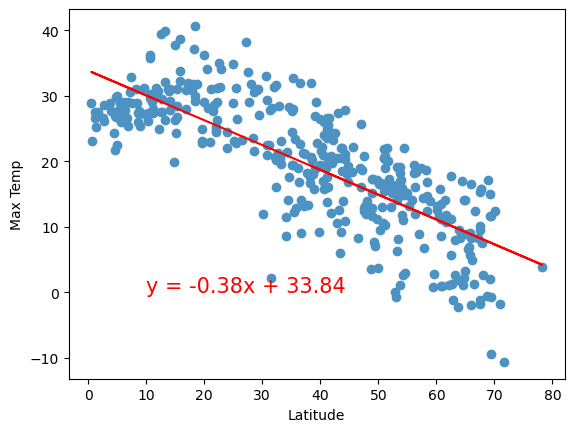

In [15]:
# Linear regression on Northern Hemisphere - Temperature vs. Latitude Linear Regression Plot

latitude_x_scatterplot = northern_hemi_df["Lat"]
temperture_y_scatterplot = northern_hemi_df["Max Temp"]

# Plot the graph
annotate_xy(latitude_x_scatterplot,temperture_y_scatterplot,(10,0),"Max Temp")


The r-value is: 0.5894826936521678


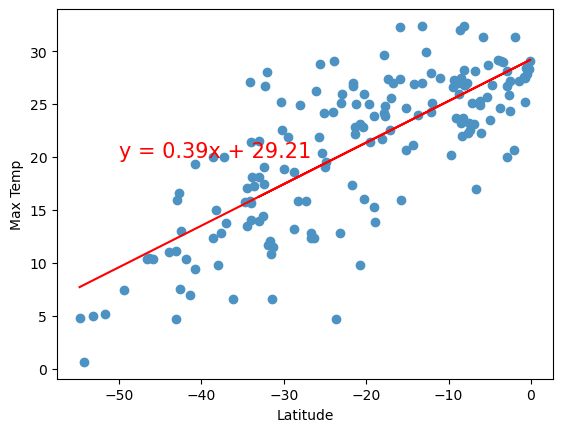

In [16]:
# Linear regression on Southern Hemisphere Temperature vs. Latitude Linear Regression Plot

latitude_x_scatterplot = southern_hemi_df["Lat"]
temperture_y_scatterplot = southern_hemi_df["Max Temp"]

# Plot the graph
annotate_xy(latitude_x_scatterplot,temperture_y_scatterplot,(-50,20),"Max Temp")


**Discussion about the linear relationship:** The above .5 r-value indicates a moderate to strong correlation between latitude and max temperature in the Northern and Southern Hemisphere(s)

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.00014814665951880764


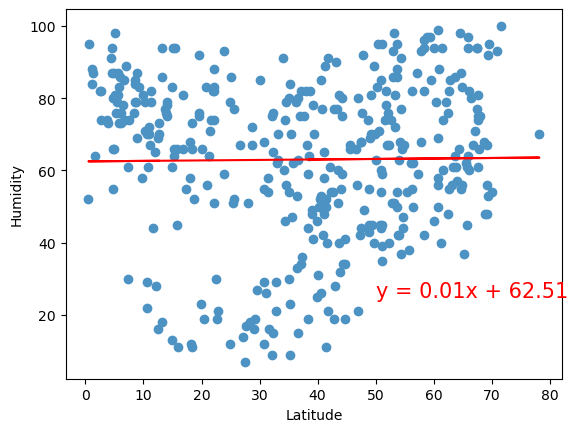

In [19]:
# Linear Regression on Northern Hemisphere - Humidity vs. Latitude Linear Regression Plot

latitude_x_scatterplot = northern_hemi_df["Lat"]
humidity_y_scatterplot = northern_hemi_df["Humidity"]

# Plot the graph

annotate_xy(latitude_x_scatterplot,humidity_y_scatterplot,(50,25),"Humidity")


The r-value is: 0.025754243904120986


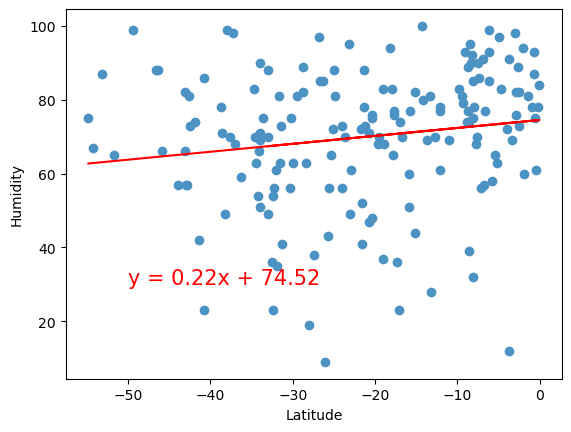

In [20]:
# Linear Regression on Southern Hemisphere - Humidity vs. Latitude Linear Regression Plot

latitude_x_scatterplot = southern_hemi_df["Lat"]
humidity_y_scatterplot = southern_hemi_df["Humidity"]

# Plot the graph
annotate_xy(latitude_x_scatterplot,humidity_y_scatterplot,(-50,30),"Humidity")


**Discussion about the linear relationship:** There is a weak to no collelation between humnidy and latitude for both the Norhtern and Southern Hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 2.854279724492376e-05


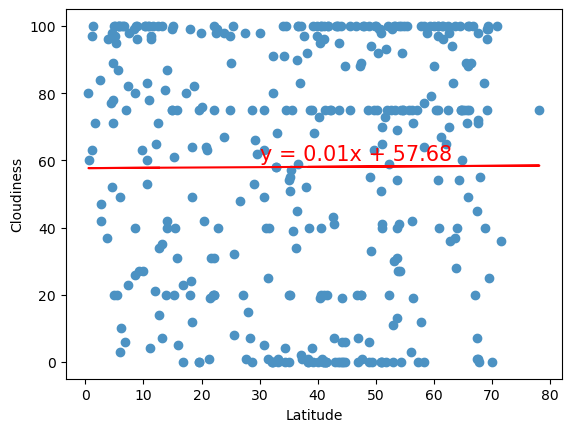

In [21]:
# Linear Regression on Northern Hemisphere - Cloudiness vs. Latitude Linear Regression Plot

latitude_x_scatterplot = northern_hemi_df["Lat"]
cloudiness_y_scatterplot = northern_hemi_df["Cloudiness"]

# Plot the graph
annotate_xy(latitude_x_scatterplot,cloudiness_y_scatterplot,(30,60),"Cloudiness")


The r-value is: 8.192094687367776e-05


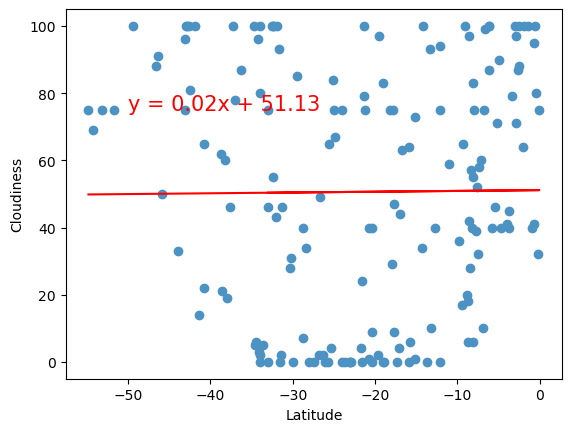

In [22]:
# Linear Regression on Southern Hemisphere - Cloudiness vs. Latitude Linear Regression Plot

latitude_x_scatterplot = southern_hemi_df["Lat"]
cloudiness_y_scatterplot = southern_hemi_df["Cloudiness"]

# Plot the graph
annotate_xy(latitude_x_scatterplot,cloudiness_y_scatterplot,(-50,75),"Cloudiness")


**Discussion about the linear relationship:** There is a weak to no collelation between cloudiness and latitude for both the Norhtern and Southern Hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.004756578366073958


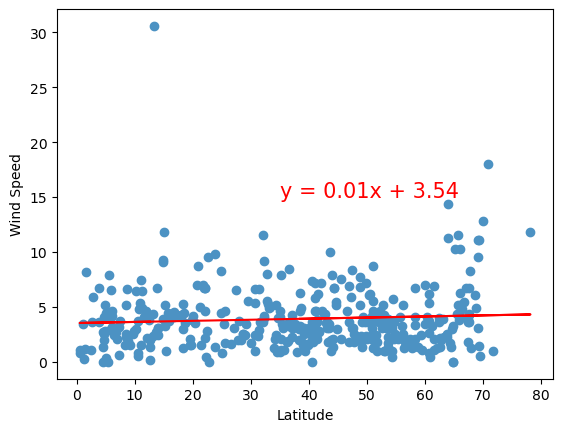

In [23]:
# Linear Regression on Northern Hemisphere - Wind Speed vs. Latitude Linear Regression Plot

latitude_x_scatterplot = northern_hemi_df["Lat"]
windspeed_y_scatterplot = northern_hemi_df["Wind Speed"]

# Plot the graph
annotate_xy(latitude_x_scatterplot,windspeed_y_scatterplot,(35,15),"Wind Speed")


The r-value is: 0.03810365356318257


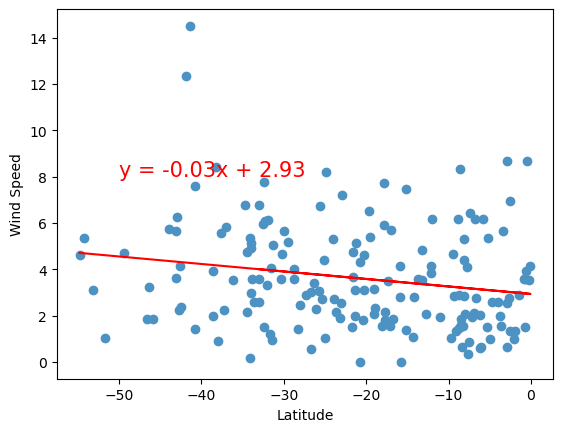

In [24]:
# Linear Regression on Southern Hemisphere - Wind Speed vs. Latitude Linear Regression Plot
latitude_x_scatterplot = southern_hemi_df["Lat"]
windspeed_y_scatterplot = southern_hemi_df["Wind Speed"]

# Plot the graph
annotate_xy(latitude_x_scatterplot,windspeed_y_scatterplot,(-50,8),"Wind Speed")


**Discussion about the linear relationship:** There is a weak to no collelation between wind speed and latitude for both the Norhtern and Southern Hemisphere